# **Introduction**
The ability to predict stock market prices accurately holds immense value for investors and analysts alike. In recent years, advancements in machine learning have opened up new avenues for forecasting, with Long Short-Term Memory (LSTM) networks emerging as a prominent technique for time series prediction.


This project is a deep dive into the realm of stock market analysis, focusing on the application of LSTM neural networks to forecast future price movements. By leveraging historical market data and sophisticated algorithms, we seek to uncover patterns and trends that can inform investment decisions.


Throughout this endeavor, we will systematically explore the process of preprocessing data, training LSTM models, and evaluating their predictive performance. Our aim is to provide a comprehensive understanding of the methodology behind LSTM-based forecasting and its implications for financial analysis.

# **1. Data Preprocessing**

This section focuses on data preprocessing and visualization for the analysis of Apple Inc. (AAPL) stock price data. It begins by importing necessary libraries and mounting Google Drive to access the dataset stored in a CSV file (`AAPL.csv`). The data is then loaded into a pandas DataFrame (`df`) and displayed to gain an initial understanding. Following this, a visualization of the closing price history over time is plotted using matplotlib.

The subsequent steps involve data preprocessing, including scaling the 'Close' column using MinMaxScaler to transform the data into a range between 0 and 1. The length of the training data is calculated to be 95% of the total dataset length, which will be used for model training. Finally, the scaled data is displayed, demonstrating the transformation achieved by the MinMaxScaler.

Overall, this section sets the stage for further analysis by preparing and visualizing the AAPL stock price data, making it ready for model training and prediction.

In [ ]:
# Importing the drive module from the google.colab package
from google.colab import drive

# Mounting Google Drive at the specified directory within the Colab environment
drive.mount('/content/drive')

# Setting the file path to the location of the AAPL.csv file in Google Drive
file_path = '/content/drive/My Drive/Colab Notebooks/AAPL.csv'

Mounted at /content/drive


In [15]:
# Importing the pandas library and aliasing it as pd for easier reference
import pandas as pd

# Reading the CSV file located at the specified file path into a pandas DataFrame
df = pd.read_csv(file_path)

# Displaying the contents of the DataFrame
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099192,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094017,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087116,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089273,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091861,73449600
...,...,...,...,...,...,...,...
10927,2024-04-18,168.029999,168.639999,166.550003,167.039993,167.039993,43122900
10928,2024-04-19,166.210007,166.399994,164.080002,165.000000,165.000000,67772100
10929,2024-04-22,165.520004,167.259995,164.770004,165.839996,165.839996,48116400
10930,2024-04-23,165.350006,167.050003,164.919998,166.899994,166.899994,48917700


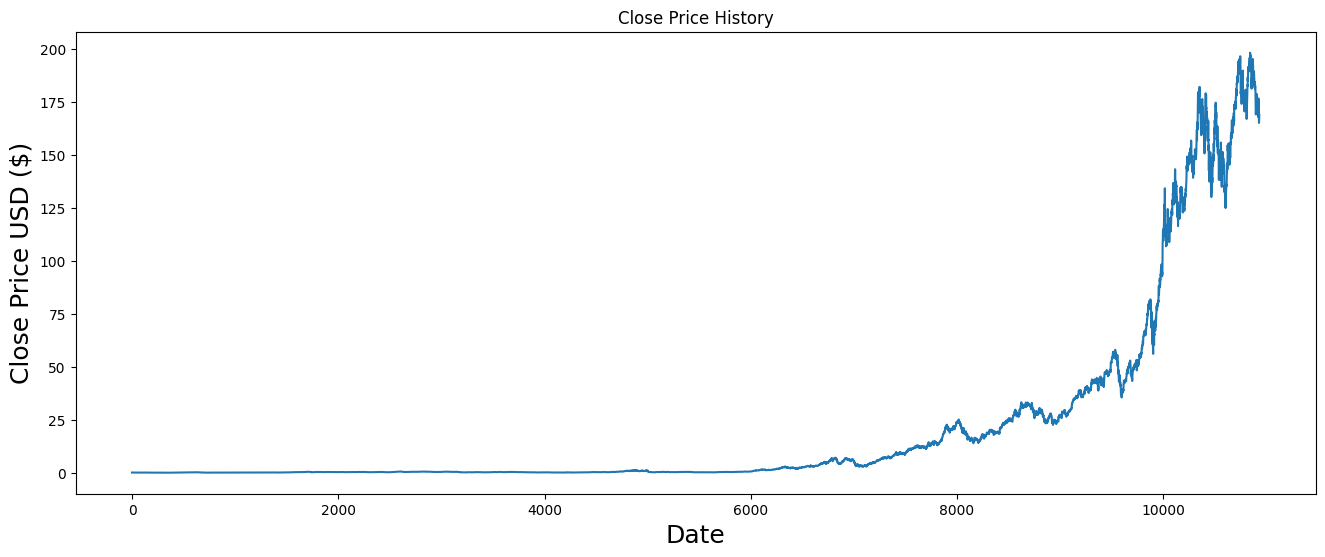

In [ ]:
# Importing the pyplot module from the matplotlib library and aliasing it as plt for easier reference
import matplotlib.pyplot as plt

# Plot the closing price against date
plt.figure(figsize=(16, 6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Importing the numpy library and aliasing it as np for easier reference
import numpy as np

# Filtering the 'Close' column from the DataFrame df and storing it in the variable 'data'
data = df.filter(['Close'])

# Converting the 'data' DataFrame to a numpy array and storing it in the variable 'dataset'
dataset = data.values

# Calculating the length of the training data, which is 95% of the total dataset length
training_data_len = int(np.ceil(len(dataset) * .95))

# Displaying the length of the training data
training_data_len

10386

In [ ]:
# Importing the MinMaxScaler class from the sklearn.preprocessing module
from sklearn.preprocessing import MinMaxScaler

# Creating a MinMaxScaler object with the feature range scaled between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))

# Scaling the dataset using the MinMaxScaler and storing the scaled data in 'scaled_data'
scaled_data = scaler.fit_transform(dataset)

# Displaying the scaled data
scaled_data

array([[4.00084027e-04],
       [3.66276242e-04],
       [3.21194147e-04],
       ...,
       [8.37070285e-01],
       [8.42422164e-01],
       [8.51257831e-01]])

# **2. Train/Test Split**

This section focuses on preparing the data for training an LSTM model for predicting stock prices. It begins by splitting the scaled data into training and testing sets using the `train_test_split` function from the `sklearn.model_selection` module. The training set consists of sequences of the previous 60 closing prices, while the corresponding labels are the subsequent closing prices. This process creates input sequences (`x_train`) and corresponding labels (`y_train`) for training the model.

The code then converts these lists into numpy arrays and reshapes them to be 3-dimensional, suitable for input to an LSTM model. Similarly, the testing dataset is created by extracting sequences of the previous 60 closing prices for testing purposes. The actual prices for comparison (`y_test`) are retrieved from the original dataset.

The provided print statements display example sequences of input data (`x_train`) and corresponding labels (`y_train`) to illustrate the data preparation process.

In summary, this section prepares the data by creating input sequences and labels for training an LSTM model to predict stock prices, along with setting up the testing dataset for evaluation.

In [ ]:
# Importing the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split

# Splitting the scaled data into training and testing sets
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

# Looping through the training data to create input sequences (x_train) and corresponding labels (y_train)
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])  # Append the previous 60 data points as input
    y_train.append(train_data[i, 0])       # Append the next data point as the label
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

# Converting the lists to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshaping the input data to be 3-dimensional for LSTM model input
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Creating the testing dataset
test_data = scaled_data[training_data_len - 60:, :]
x_test = []

# Looping through the test data to create input sequences for testing (x_test)
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Converting the list to a numpy array and reshaping it for model input
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Retrieving the actual prices for comparison
y_test = dataset[training_data_len:, :]

[array([0.00040008, 0.00036628, 0.00032119, 0.00033528, 0.00035219,
       0.00038881, 0.00041981, 0.00044798, 0.00048461, 0.00055223,
       0.0005635 , 0.00054378, 0.00052124, 0.00052969, 0.00051279,
       0.00047897, 0.00044798, 0.0004339 , 0.00047052, 0.00046489,
       0.00043953, 0.00044235, 0.00045644, 0.0004508 , 0.00049306,
       0.00047052, 0.00048461, 0.00049306, 0.00049024, 0.00047897,
       0.00047334, 0.0004508 , 0.00042544, 0.00038881, 0.00035219,
       0.00037473, 0.00039727, 0.00039727, 0.00040008, 0.00036628,
       0.00036628, 0.00034656, 0.00034092, 0.00032683, 0.00034092,
       0.00036628, 0.00032965, 0.00029866, 0.00030711, 0.00028739,
       0.00032119, 0.00032965, 0.00034937, 0.00035219, 0.00034374,
       0.0003381 , 0.00033528, 0.00032965, 0.00028457, 0.00025921])]
[0.0002394869529368074]

[array([0.00040008, 0.00036628, 0.00032119, 0.00033528, 0.00035219,
       0.00038881, 0.00041981, 0.00044798, 0.00048461, 0.00055223,
       0.0005635 , 0.00054378, 0.

# **3. Build LSTM Model**

This section focuses on defining and training an LSTM model using Keras, a high-level neural networks API. It begins by importing necessary modules from Keras: `Sequential` for creating the model architecture and layers, and `LSTM` and `Dense` for adding LSTM and fully connected (Dense) layers to the model, respectively. Then, a function named `build_model` is defined to construct and train the LSTM model. Inside this function:

- A Sequential model is created.
- An LSTM layer with 128 units and `return_sequences=True` is added to process sequences of input data. The input shape is determined by the shape of `x_train`.
- Another LSTM layer with 64 units and `return_sequences=False` is added, indicating that only the last output is considered.
- A Dense layer with 25 neurons is added for further processing.
- The output layer with a single neuron is added for predicting the next closing price.
- The model is compiled using the Adam optimizer and mean squared error loss.
- The model is trained on the training data (`x_train` and `y_train`) for the specified number of epochs and batch size, with `verbose=0` to suppress progress bar display.

The function returns the trained model.

Overall, this section outlines the process of building and training an LSTM model for predicting stock prices based on historical data.


In [ ]:
# Importing necessary modules from Keras
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Defining a function to build and train the LSTM model
def build_model(batch_size, epochs):
    # Creating a Sequential model
    model = Sequential()

    # Adding an LSTM layer with 128 units and return sequences for each time step
    # Input shape is determined by the shape of x_train
    model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))

    # Adding another LSTM layer with 64 units and no return sequences (only the last output is considered)
    model.add(LSTM(64, return_sequences=False))

    # Adding a Dense layer with 25 neurons
    model.add(Dense(25))

    # Adding the output layer with 1 neuron (for single-value prediction)
    model.add(Dense(1))

    # Compiling the model with Adam optimizer and mean squared error loss
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Training the model on the training data
    # verbose=0 means silent training (no progress bar)
    model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    # Returning the trained model
    return model

# **4. Evaluate Model**

This section of the Jupyter Notebook focuses on evaluating the trained LSTM model's performance using various metrics. It begins by importing necessary modules for evaluation: `mean_squared_error`, `mean_absolute_error`, and `r2_score` from `sklearn.metrics`, and `math` for mathematical operations.

A function named `evaluate_model` is defined to assess the model's performance. Inside this function:

- The model makes predictions on the test data (`x_test`) using the `predict` method.
- The predicted values are inverse transformed to the original scale using `scaler.inverse_transform`.
- Mean squared error (MSE) is calculated using `mean_squared_error` between the true labels (`y_test`) and predicted values (`y_pred`).
- Mean absolute error (MAE) is calculated using `mean_absolute_error`.
- Root mean squared error (RMSE) is computed by taking the square root of MSE.
- R-squared (coefficient of determination) is calculated using `r2_score`.
- The function returns the evaluation metrics: MSE, MAE, RMSE, and R-squared.

Overall, this section defines a function to evaluate the trained LSTM model's performance using various metrics, providing insights into its predictive capabilities.


In [ ]:
# Importing necessary modules for evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

# Defining a function to evaluate the model
def evaluate_model(model, x_test, y_test):
    # Making predictions on the test data
    y_pred = model.predict(x_test)

    # Inverse transforming the predictions to the original scale
    y_pred = scaler.inverse_transform(y_pred)

    # Calculating mean squared error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Calculating mean absolute error (MAE)
    mae = mean_absolute_error(y_test, y_pred)

    # Calculating root mean squared error (RMSE)
    rmse = math.sqrt(mse)

    # Calculating R-squared (coefficient of determination)
    r2 = r2_score(y_test, y_pred)

    # Returning the evaluation metrics
    return mse, mae, rmse, r2

# **5. Train/Test Best Epoch**

This section conducts a systematic evaluation of an LSTM model's performance by varying the number of epochs.

- Initially, a range of epochs from 2 to 100 with a step size of 2 is defined for testing.
- A static batch size of 32 is set for consistency across experiments.
- Metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared (R^2) are collected for each epoch in the specified range.
- For each epoch value in the range, a model is built and trained using the `build_model` function.
- The trained model's performance is evaluated using the `evaluate_model` function on the test data (`x_test` and `y_test`).
- Evaluation metrics, including MSE, MAE, RMSE, and R^2, are printed to provide insights into the model's performance at each epoch.
- Finally, the collected metrics are plotted against the number of epochs to visualize the model's performance trends over the training process.


Testing 2 Epochs...
18/18 [==============================] - 1s 5ms/step
MSE: 27.25497047744149
MAE: 4.312043414109002
RMSE: 5.220629318141778
R^2: 0.9156344513186722
Testing 4 Epochs...
18/18 [==============================] - 1s 4ms/step
MSE: 22.795032473620797
MAE: 3.8656741637781162
RMSE: 4.774414359229914
R^2: 0.9294398273724993
Testing 6 Epochs...
18/18 [==============================] - 1s 4ms/step
MSE: 23.406078814517695
MAE: 4.05034688148627
RMSE: 4.83798292829953
R^2: 0.9275483830261497
Testing 8 Epochs...
18/18 [==============================] - 1s 4ms/step
MSE: 14.655662366084218
MAE: 3.134494919404976
RMSE: 3.8282714592991205
R^2: 0.954634586824214
Testing 10 Epochs...
18/18 [==============================] - 1s 5ms/step
MSE: 11.74557473232884
MAE: 2.771127208782265
RMSE: 3.4271817477818187
R^2: 0.9636425268671402
Testing 12 Epochs...
18/18 [==============================] - 1s 4ms/step
MSE: 17.66182577450877
MAE: 3.36373419685783
RMSE: 4.202597503272086
R^2: 0.94532925201

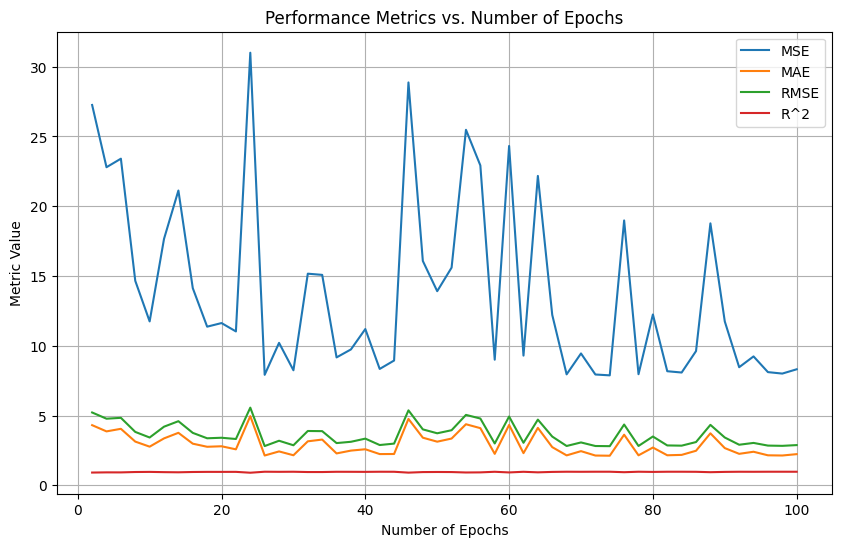

In [ ]:
# Define a range of epochs to test
epochs_range = range(2, 101, 2)

# Define a static batch size
batch_size = 32

# Store metrics for each epoch
epoch_metrics = {'mse': [], 'mae': [], 'rmse': [], 'r2': []}

# Iterate over each epoch in the range
for epoch in epochs_range:
    print(f"Testing {epoch} Epochs...")

    # Build a model for the current epoch
    model = build_model(batch_size, epoch)

    # Evaluate the model's performance on the test data
    mse, mae, rmse, r2 = evaluate_model(model, x_test, y_test)

    # Print evaluation metrics
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R^2: {r2}")

    # Append the metrics to the dictionary
    epoch_metrics['mse'].append(mse)
    epoch_metrics['mae'].append(mae)
    epoch_metrics['rmse'].append(rmse)
    epoch_metrics['r2'].append(r2)

# Plot the metrics against epochs
plt.figure(figsize=(10, 6))
plt.plot(list(epochs_range), epoch_metrics['mse'], label='MSE')
plt.plot(list(epochs_range), epoch_metrics['mae'], label='MAE')
plt.plot(list(epochs_range), epoch_metrics['rmse'], label='RMSE')
plt.plot(list(epochs_range), epoch_metrics['r2'], label='R^2')
plt.xlabel('Number of Epochs')
plt.ylabel('Metric Value')
plt.title('Performance Metrics vs. Number of Epochs')
plt.legend()
plt.grid(True)
plt.show()


# **6. Train/Test Best Batch Size**

This section investigates the effect of varying batch sizes on the performance metrics of the LSTM model.

- A range of batch sizes from 2 to 32 with a step size of 2 is defined for testing.
- The best epoch obtained from the earlier test (25 epochs) is used as a reference for building models with different batch sizes.
- Metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared (R^2) are stored for each batch size.
- For each batch size in the specified range, a model is built and trained using the best epoch.
- The performance of each model is evaluated using the `evaluate_model` function on the test data (`x_test` and `y_test`).
- Evaluation metrics, including MSE, MAE, RMSE, and R^2, are printed to assess the model's performance with different batch sizes.
- The collected metrics are then plotted against the batch sizes to visualize the impact of batch size variation on model performance.

Testing 2 Batch Sizes...
18/18 [==============================] - 1s 4ms/step
MSE: 15.179059627020205
MAE: 3.137768898175474
RMSE: 3.8960312661759025
R^2: 0.9530144530899392
Testing 4 Batch Sizes...
18/18 [==============================] - 1s 4ms/step
MSE: 31.083575320833674
MAE: 4.978804045452187
RMSE: 5.575264596486312
R^2: 0.9037833158142652
Testing 6 Batch Sizes...
18/18 [==============================] - 1s 4ms/step
MSE: 13.933940369056229
MAE: 2.985941751157209
RMSE: 3.732819359285449
R^2: 0.9568686186799831
Testing 8 Batch Sizes...
18/18 [==============================] - 1s 4ms/step
MSE: 7.805476359601296
MAE: 2.102590739166595
RMSE: 2.7938282623671227
R^2: 0.9758387815410794
Testing 10 Batch Sizes...
18/18 [==============================] - 1s 4ms/step
MSE: 8.181974425185023
MAE: 2.2088304362497846
RMSE: 2.8604150791773253
R^2: 0.9746733623414248
Testing 12 Batch Sizes...
18/18 [==============================] - 1s 4ms/step
MSE: 30.42578706202147
MAE: 4.874066390007942
RMSE: 5

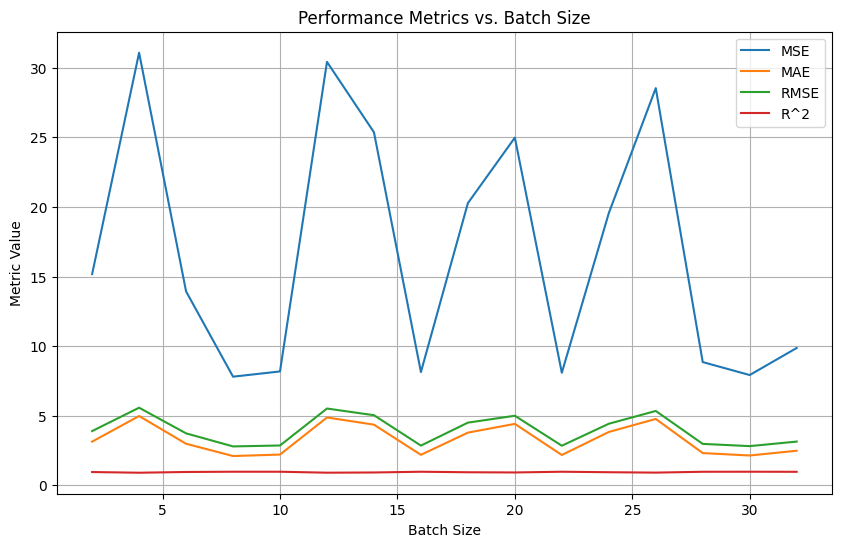

In [ ]:
# Define a range of batch sizes to test
batch_sizes = range(2, 33, 2)

# Best obtained epoch from earlier test
best_epoch = 25

# Store metrics for each batch size
batch_metrics = {'mse': [], 'mae': [], 'rmse': [], 'r2': []}

# Iterate over each batch size in the range
for batch_size in batch_sizes:
    print(f"Testing {batch_size} Batch Sizes...")

    # Build a model for the current batch size using the best epoch
    model = build_model(batch_size, best_epoch)

    # Evaluate the model's performance on the test data
    mse, mae, rmse, r2 = evaluate_model(model, x_test, y_test)

    # Print evaluation metrics
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R^2: {r2}")

    # Append the metrics to the dictionary
    batch_metrics['mse'].append(mse)
    batch_metrics['mae'].append(mae)
    batch_metrics['rmse'].append(rmse)
    batch_metrics['r2'].append(r2)

# Plot the metrics against batch sizes
plt.figure(figsize=(10, 6))
plt.plot(list(batch_sizes), batch_metrics['mse'], label='MSE')
plt.plot(list(batch_sizes), batch_metrics['mae'], label='MAE')
plt.plot(list(batch_sizes), batch_metrics['rmse'], label='RMSE')
plt.plot(list(batch_sizes), batch_metrics['r2'], label='R^2')
plt.xlabel('Batch Size')
plt.ylabel('Metric Value')
plt.title('Performance Metrics vs. Batch Size')
plt.legend()
plt.grid(True)
plt.show()


# **7. Final Model and Predictions**

This section involves the final steps of training, evaluating, and visualizing the LSTM model's performance for predicting stock prices.

- The model architecture is defined using the Sequential API from Keras. Two LSTM layers with 128 and 64 units, respectively, are added, followed by two Dense layers with 25 and 1 neuron(s), respectively.
- The model is compiled with the Adam optimizer and mean squared error loss function.
- Training of the model is carried out using the `fit` method with 25 epochs, a batch size of 8, and verbose mode enabled for progress display.
- The final trained model is evaluated using the `evaluate_model` function to compute metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared (R^2).
- The evaluation metrics are printed to assess the model's performance.
- Predictions are made on the test data using the trained model, and the predictions are then inverse transformed to the original scale.
- Root Mean Squared Error (RMSE) is calculated separately for clarity.
- The data is split into training and validation sets, and a new column 'Predictions' is added to the validation set to store the predicted closing prices.
- A plot is generated to visualize the actual closing prices for both the training and validation sets, along with the predicted closing prices.
- Finally, the contents of the 'valid' DataFrame, including the actual and predicted closing prices, are displayed.

In [11]:
# Define the model architecture
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model with Adam optimizer and mean squared error loss
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with specified epochs, batch size, and verbose level
model.fit(x_train, y_train, epochs=25, batch_size=8, verbose=1)

# Evaluate the final model using the evaluate_model function
mse, mae, rmse, r2 = evaluate_model(model, x_test, y_test)

# Print the evaluation metrics
print("Final Model Evaluation Metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

# Predictions on the test data
predictions = model.predict(x_test)

# Inverse transform the predictions to the original scale
predictions = scaler.inverse_transform(predictions)

# Calculate RMSE separately for clarity
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

Epoch 1/25
1291/1291 [==============================] - 109s 81ms/step - loss: 1.8431e-04
Epoch 2/25
1291/1291 [==============================] - 91s 70ms/step - loss: 1.2797e-04
Epoch 3/25
1291/1291 [==============================] - 86s 67ms/step - loss: 6.3791e-05
Epoch 4/25
1291/1291 [==============================] - 88s 68ms/step - loss: 7.8645e-05
Epoch 5/25
1291/1291 [==============================] - 86s 67ms/step - loss: 5.8115e-05
Epoch 6/25
1291/1291 [==============================] - 89s 69ms/step - loss: 5.1649e-05
Epoch 7/25
1291/1291 [==============================] - 87s 67ms/step - loss: 3.5683e-05
Epoch 8/25
1291/1291 [==============================] - 89s 69ms/step - loss: 3.6959e-05
Epoch 9/25
1291/1291 [==============================] - 89s 69ms/step - loss: 4.6636e-05
Epoch 10/25
1291/1291 [==============================] - 87s 67ms/step - loss: 4.2308e-05
Epoch 11/25
1291/1291 [==============================] - 88s 68ms/step - loss: 4.8836e-05
Epoch 12/25
1291/1

2.837828664698218

<ipython-input-14-3488eebfae69>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


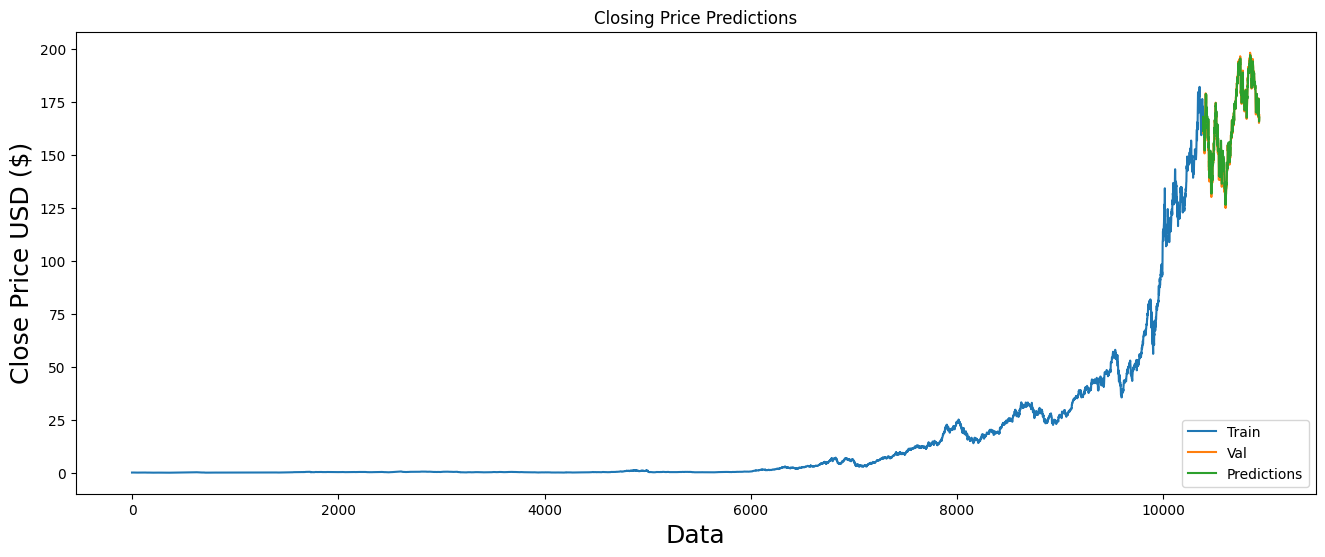

In [14]:
# Splitting the data into training and validation sets
train = data[:training_data_len]  # Training data
valid = data[training_data_len:]  # Validation data

# Adding a new column 'Predictions' to the validation set to store the predicted closing prices
valid['Predictions'] = predictions

# Plotting the actual closing prices for training and validation sets, along with the predicted closing prices
plt.figure(figsize=(16,6))
plt.title('Closing Price Predictions')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])            # Plotting the closing prices of the training set
plt.plot(valid[['Close', 'Predictions']])  # Plotting the closing prices of the validation set and the predictions
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')  # Adding legend
plt.show()

In [13]:
# Displaying the contents of the 'valid' DataFrame, which includes the actual closing prices and the predicted closing prices
valid

,Close,Predictions
10386,164.320007,167.860352
10387,160.070007,165.036652
10388,162.740005,161.020981
10389,164.850006,163.937454
10390,165.119995,165.763290
...,...,...
10927,167.039993,168.558670
10928,165.000000,167.675018
10929,165.839996,165.672943
10930,166.899994,166.634750
